## Here we look at how well the top genes from SiRCle work compared with the top DE genes or a random forest etc trained on the based dataset


1. Use the genes we've identified in the TPDS, TPDE, MDE, & MDS   
2. Compare to the top genes individually from each dataset  
3. Compare to the top genes from concatenated dataset

### Next do the same for each of the comparisons
4. Use the top genes identified by the VAE to detect differences between groups
5. Do the same with the top DEGs we identified using the basic methods!

In [1]:
import pandas as pd
import numpy as np

data_dir = f'../data/sircle/F9_prediction/'


In [7]:
# The first thing will be testing on all significant DE genes.
de_dir = f'../data/sircle/F2_DE_output_TvN/'
cptac_rna_df = pd.read_csv(f'{de_dir}rna_DE_all_patients_ccRCC_sircle.csv')
cptac_rna_df
raw_rna_df = pd.read_csv('../data/sircle/F1_DE_input_TvN/rna_data_all_patients_ccRCC_sircle.csv')
raw_rna_df
tcga_df_all = pd.read_csv(f'{data_dir}TCGA_rna_df.csv')
tcga_df_all['ensembl_gene_id'] = [c.split('.')[0] for c in tcga_df_all['id'].values]

10259 66 173


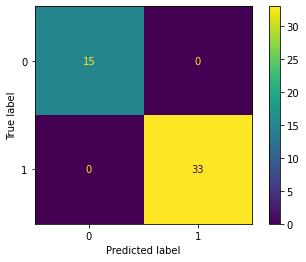

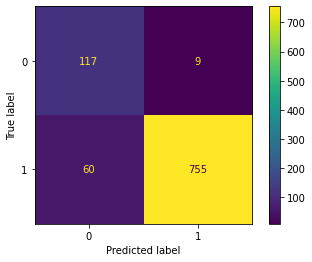

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

de_genes = cptac_rna_df[cptac_rna_df['padj_rna'] < 0.05]
de_genes = cptac_rna_df[abs(cptac_rna_df['logFC_rna']) > 1.0]['ensembl_gene_id'].values
de_genes = raw_rna_df[raw_rna_df.ensembl_gene_id.isin(de_genes)]

# Now we want to save for each training the genes as features and each patient as a training data
normal_patients = de_genes[['ensembl_gene_id'] + [c for c in de_genes.columns if 'Normal' in c]]
tumor_patients = de_genes[['ensembl_gene_id'] + [c for c in de_genes.columns if 'Tumor' in c]]
print(len(de_genes), len(normal_patients.columns) -1, len(tumor_patients.columns) - 1)

normal_patients.set_index('ensembl_gene_id', inplace=True)
tumor_patients.set_index('ensembl_gene_id', inplace=True)
tumor_patients  = tumor_patients.T
normal_patients = normal_patients.T

all_patients = pd.concat([tumor_patients, normal_patients])

X = np.log2(all_patients.values + 1)
y = [1]* len(tumor_patients) + [0] * len(normal_patients)
clf = RandomForestClassifier(max_depth=2, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()


# Test on the TCGA dataset
shared_genes = list(de_genes['ensembl_gene_id'].values)

tcga_df = tcga_df_all[tcga_df_all['ensembl_gene_id'].isin(shared_genes)]
tcga_df[['ensembl_gene_id'] + [c for c in tcga_df.columns if 'TCGA' in c]].to_csv(f'{data_dir}TCGA_rna_norm.csv', index=False)
tcga_df = tcga_df[['ensembl_gene_id'] + [c for c in tcga_df.columns if 'TCGA' in c]]
tcga_df.set_index('ensembl_gene_id', inplace=True)
tcga_df = tcga_df.T
tcga_genes = tcga_df[list(all_patients.columns)]
tcga_genes = np.log2(tcga_genes + 1)
y_test = [1 if 'Tumor' in c else 0 for c in tcga_genes.index.values]
plot_confusion_matrix(clf, tcga_genes.values, y_test)

432 66 173


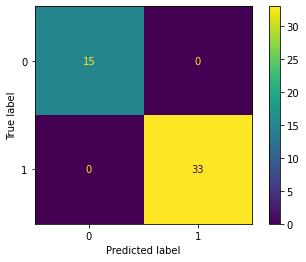

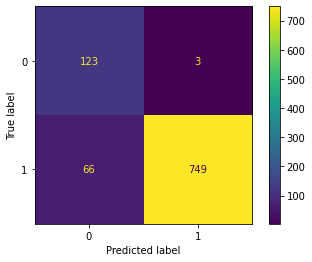

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

de_genes = cptac_rna_df[cptac_rna_df['padj_rna'] < 0.05]
de_genes = cptac_rna_df[abs(cptac_rna_df['logFC_rna']) > 5.0]['ensembl_gene_id'].values
de_genes = raw_rna_df[raw_rna_df.ensembl_gene_id.isin(de_genes)]
# Now we want to save for each training the genes as features and each patient as a training data
normal_patients = de_genes[['ensembl_gene_id'] + [c for c in de_genes.columns if 'Normal' in c]]
tumor_patients = de_genes[['ensembl_gene_id'] + [c for c in de_genes.columns if 'Tumor' in c]]
print(len(de_genes), len(normal_patients.columns) -1, len(tumor_patients.columns) - 1)

normal_patients.set_index('ensembl_gene_id', inplace=True)
tumor_patients.set_index('ensembl_gene_id', inplace=True)
tumor_patients  = tumor_patients.T
normal_patients = normal_patients.T

all_patients = pd.concat([tumor_patients, normal_patients])

X = np.log2(all_patients.values + 1)
y = [1]* len(tumor_patients) + [0] * len(normal_patients)
clf = RandomForestClassifier(max_depth=2, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()


# Test on the TCGA dataset
shared_genes = list(de_genes['ensembl_gene_id'].values)

tcga_df = tcga_df_all[tcga_df_all['ensembl_gene_id'].isin(shared_genes)]
tcga_df[['ensembl_gene_id'] + [c for c in tcga_df.columns if 'TCGA' in c]].to_csv(f'{data_dir}TCGA_rna_norm.csv', index=False)
tcga_df = tcga_df[['ensembl_gene_id'] + [c for c in tcga_df.columns if 'TCGA' in c]]
tcga_df.set_index('ensembl_gene_id', inplace=True)
tcga_df = tcga_df.T
tcga_genes = tcga_df[list(all_patients.columns)]
tcga_genes = np.log2(tcga_genes + 1)
y_test = [1 if 'Tumor' in c else 0 for c in tcga_genes.index.values]
plot_confusion_matrix(clf, tcga_genes.values, y_test)

10256 66 173
              precision    recall  f1-score   support

      Tumour       0.73      0.90      0.81        21
      Normal       0.96      0.88      0.92        58

    accuracy                           0.89        79
   macro avg       0.85      0.89      0.86        79
weighted avg       0.90      0.89      0.89        79



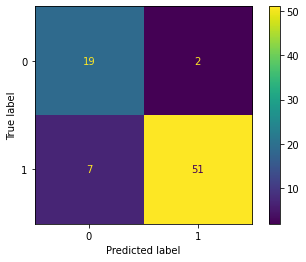

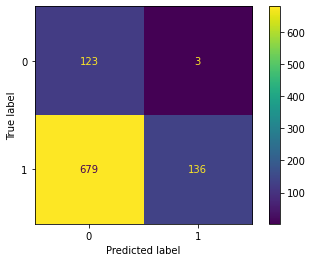

              precision    recall  f1-score   support

      Tumour       0.15      0.98      0.27       126
      Normal       0.98      0.17      0.29       815

    accuracy                           0.28       941
   macro avg       0.57      0.57      0.28       941
weighted avg       0.87      0.28      0.28       941



In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.metrics import classification_report
from sciutil import SciUtil

u = SciUtil()

de_genes = cptac_rna_df.copy() #[rcm_df['Regulation_Grouping_2'].isin([r])]['ensembl_gene_id'].values
de_genes = de_genes[de_genes['padj_rna'] < 0.05]
de_genes = de_genes[abs(de_genes['logFC_rna']) > 1]['ensembl_gene_id'].values

de_genes = raw_rna_df[raw_rna_df.ensembl_gene_id.isin(de_genes)]
# Now we want to save for each training the genes as features and each patient as a training data
normal_patients = de_genes[['ensembl_gene_id'] + [c for c in de_genes.columns if 'Normal' in c]]
tumor_patients = de_genes[['ensembl_gene_id'] + [c for c in de_genes.columns if 'Tumor' in c]]
print(len(de_genes), len(normal_patients.columns) -1, len(tumor_patients.columns) - 1)

normal_patients.set_index('ensembl_gene_id', inplace=True)
tumor_patients.set_index('ensembl_gene_id', inplace=True)
tumor_patients  = tumor_patients.T
normal_patients = normal_patients.T

all_patients = pd.concat([tumor_patients, normal_patients])

X = np.log2(all_patients.values + 1)
y = [1]* len(tumor_patients) + [0] * len(normal_patients)
clf = DecisionTreeClassifier(random_state=0, max_depth=1, min_samples_split=20, min_samples_leaf=5, max_features=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf.fit(X_train, y_train)

plot_confusion_matrix(clf, X_test, y_test)  

print(classification_report(y_test, clf.predict(X_test), target_names=['Tumour', 'Normal']))

plt.show()

# Test on the TCGA dataset
shared_genes = list(de_genes['ensembl_gene_id'].values)

tcga_df = tcga_df_all[tcga_df_all['ensembl_gene_id'].isin(shared_genes)]
tcga_df = tcga_df[['ensembl_gene_id'] + [c for c in tcga_df.columns if 'TCGA' in c]]
tcga_df.set_index('ensembl_gene_id', inplace=True)
tcga_df = tcga_df.T
tcga_genes = tcga_df[list(all_patients.columns)]
X_test = np.log2(tcga_genes + 1)
y_test = [1 if 'Tumor' in c else 0 for c in tcga_genes.index.values]
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

print(classification_report(y_test, clf.predict(X_test), target_names=['Tumour', 'Normal']))


912 66 173
              precision    recall  f1-score   support

      Tumour       0.95      0.90      0.93        21
      Normal       0.97      0.98      0.97        58

    accuracy                           0.96        79
   macro avg       0.96      0.94      0.95        79
weighted avg       0.96      0.96      0.96        79



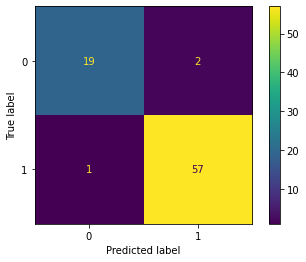

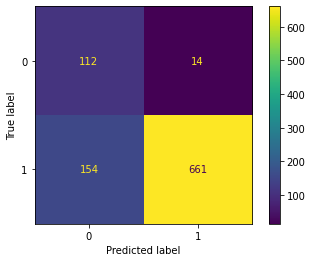

              precision    recall  f1-score   support

      Tumour       0.42      0.89      0.57       126
      Normal       0.98      0.81      0.89       815

    accuracy                           0.82       941
   macro avg       0.70      0.85      0.73       941
weighted avg       0.90      0.82      0.84       941



In [11]:

u = SciUtil()

de_genes = cptac_rna_df.copy() #[rcm_df['Regulation_Grouping_2'].isin([r])]['ensembl_gene_id'].values
de_genes = de_genes[de_genes['padj_rna'] < 0.05]
de_genes = de_genes[abs(de_genes['logFC_rna']) > 4]['ensembl_gene_id'].values

de_genes = raw_rna_df[raw_rna_df.ensembl_gene_id.isin(de_genes)]
# Now we want to save for each training the genes as features and each patient as a training data
normal_patients = de_genes[['ensembl_gene_id'] + [c for c in de_genes.columns if 'Normal' in c]]
tumor_patients = de_genes[['ensembl_gene_id'] + [c for c in de_genes.columns if 'Tumor' in c]]
print(len(de_genes), len(normal_patients.columns) -1, len(tumor_patients.columns) - 1)

normal_patients.set_index('ensembl_gene_id', inplace=True)
tumor_patients.set_index('ensembl_gene_id', inplace=True)
tumor_patients  = tumor_patients.T
normal_patients = normal_patients.T

all_patients = pd.concat([tumor_patients, normal_patients])

X = np.log2(all_patients.values + 1)
y = [1]* len(tumor_patients) + [0] * len(normal_patients)
clf = DecisionTreeClassifier(random_state=0, max_depth=1, min_samples_split=20, min_samples_leaf=5, max_features=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf.fit(X_train, y_train)

plot_confusion_matrix(clf, X_test, y_test)  

print(classification_report(y_test, clf.predict(X_test), target_names=['Tumour', 'Normal']))

plt.show()

# Test on the TCGA dataset
shared_genes = list(de_genes['ensembl_gene_id'].values)

tcga_df = tcga_df_all[tcga_df_all['ensembl_gene_id'].isin(shared_genes)]
tcga_df = tcga_df[['ensembl_gene_id'] + [c for c in tcga_df.columns if 'TCGA' in c]]
tcga_df.set_index('ensembl_gene_id', inplace=True)
tcga_df = tcga_df.T
tcga_genes = tcga_df[list(all_patients.columns)]
X_test = np.log2(tcga_genes + 1)
y_test = [1 if 'Tumor' in c else 0 for c in tcga_genes.index.values]
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

print(classification_report(y_test, clf.predict(X_test), target_names=['Tumour', 'Normal']))


In [12]:
high_expr_de_genes = de_genes['ensembl_gene_id'].values
len(high_expr_de_genes)

912

In [13]:
rcm_df = pd.read_csv(f'../data/sircle/F3_regulatory_clustering/RCM_all_patients_ccRCC_N_P0.5-R1.0-M0.1-GENES.csv')
rcm_df

,ensembl_gene_id,logFC_rna,padj_rna,logFC_meth,padj_meth,CpG_Beta_diff,external_gene_name,entrezgene_id,hgnc_symbol,logFC_protein,padj_protein,Regulation_Grouping_1,Regulation_Grouping_2,Regulation_Grouping_3
0,ENSG00000000003,-0.773760,2.069123e-25,0.737118,4.262528e-13,0.117126,TSPAN6,7105.0,TSPAN6,-0.331391,1.633907e-09,None,None,None
1,ENSG00000000005,-1.224928,2.276478e-09,-2.248647,1.575338e-36,-0.322769,TNMD,64102.0,TNMD,0.000000,1.000000e+00,TPDS_TMDE_M-neg_R-neg_P--,TPDS_TMDE,TMDE
2,ENSG00000000419,0.262502,1.144629e-09,-0.894159,5.754591e-41,-0.045623,DPM1,8813.0,DPM1,-0.209029,9.204529e-16,None,None,None
3,ENSG00000000457,-0.059245,4.181967e-02,0.000000,1.000000e+00,0.000000,SCYL3,57147.0,SCYL3,0.116679,4.600691e-04,None,None,None
4,ENSG00000000460,0.654210,6.356361e-75,-1.646072,1.987548e-48,-0.205992,C1orf112,55732.0,C1orf112,0.000000,1.000000e+00,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17016,ENSG00000284571,0.000000,1.000000e+00,1.365353,2.166469e-35,0.217862,0,2314.0,0,0.082422,4.782851e-05,None,None,None
17017,ENSG00000285152,0.000000,1.000000e+00,0.420087,1.792989e-07,0.070815,0,55072.0,0,0.045574,2.166536e-03,None,None,None
17018,ENSG00000288293,0.000000,1.000000e+00,1.531347,2.843634e-17,0.111775,0,54862.0,0,0.030127,4.164955e-02,None,None,None
17019,ENSG00000288705,0.000000,1.000000e+00,-0.828777,8.676429e-14,-0.113739,0,54579.0,0,0.121802,1.732983e-04,None,None,None


In [14]:
rcm_df[rcm_df['Regulation_Grouping_2'].isin(['TPDE', 'TPDS'])]

,ensembl_gene_id,logFC_rna,padj_rna,logFC_meth,padj_meth,CpG_Beta_diff,external_gene_name,entrezgene_id,hgnc_symbol,logFC_protein,padj_protein,Regulation_Grouping_1,Regulation_Grouping_2,Regulation_Grouping_3
24,ENSG00000002746,-4.466524,1.107145e-86,-2.826851,5.589122e-89,-0.384366,HECW1,23072.0,HECW1,-1.100890,1.937882e-37,TPDS_M-neg_R-neg_P-neg,TPDS,TPDS
42,ENSG00000004468,1.882682,5.582156e-44,0.503384,1.288396e-06,0.060633,CD38,952.0,CD38,0.548961,5.666201e-17,TPDE_M--_R-pos_P-pos,TPDE,TPDE
65,ENSG00000005022,-1.532446,1.570743e-188,-0.687485,1.115552e-02,-0.037853,SLC25A5,292.0,SLC25A5,-1.013890,6.522332e-62,TPDS_M--_R-neg_P-neg,TPDS,TPDS
73,ENSG00000005187,-1.431659,1.017292e-36,-1.043509,2.036059e-23,-0.136594,ACSM3,6296.0,ACSM3,-1.586286,1.682058e-59,TPDS_M-neg_R-neg_P-neg,TPDS,TPDS
77,ENSG00000005249,-1.511901,2.243709e-55,0.000000,1.000000e+00,0.000000,PRKAR2B,5577.0,PRKAR2B,-1.150135,1.089907e-57,TPDS_M--_R-neg_P-neg,TPDS,TPDS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16843,ENSG00000272573,-1.112492,3.742229e-16,-0.346657,1.207874e-18,-0.020425,MUSTN1,389125.0,MUSTN1,-0.520372,1.321728e-08,TPDS_M--_R-neg_P-neg,TPDS,TPDS
16893,ENSG00000276076,-6.001519,4.885158e-51,0.000000,1.000000e+00,0.000000,CRYAA2,102724652.0,CRYAA2,-0.854975,2.522530e-39,TPDS_M--_R-neg_P-neg,TPDS,TPDS
16897,ENSG00000276644,-2.615148,2.862942e-95,0.450815,3.957426e-14,0.023910,DACH1,1602.0,DACH1,-0.972962,5.735663e-58,TPDS_M--_R-neg_P-neg,TPDS,TPDS
16902,ENSG00000277443,1.605389,3.530873e-128,1.463208,1.278621e-64,0.073721,MARCKS,4082.0,MARCKS,0.673681,1.626917e-37,TPDE_M--_R-pos_P-pos,TPDE,TPDE


--------------------------------------------------------------------------------
                                      MDS	                                      
--------------------------------------------------------------------------------
131 66 173
              precision    recall  f1-score   support

      Tumour       1.00      1.00      1.00        15
      Normal       1.00      1.00      1.00        33

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



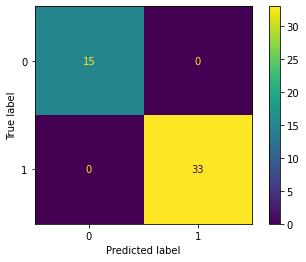

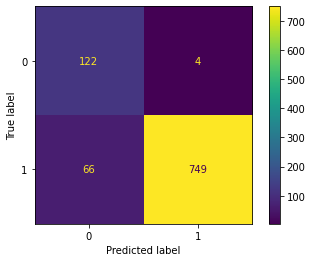

              precision    recall  f1-score   support

      Tumour       0.65      0.97      0.78       126
      Normal       0.99      0.92      0.96       815

    accuracy                           0.93       941
   macro avg       0.82      0.94      0.87       941
weighted avg       0.95      0.93      0.93       941

--------------------------------------------------------------------------------
                                   MDS_TMDE	                                    
--------------------------------------------------------------------------------
463 66 173
              precision    recall  f1-score   support

      Tumour       1.00      1.00      1.00        15
      Normal       1.00      1.00      1.00        33

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



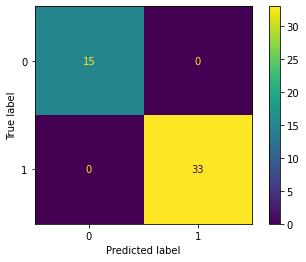

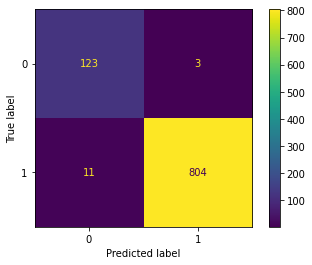

              precision    recall  f1-score   support

      Tumour       0.92      0.98      0.95       126
      Normal       1.00      0.99      0.99       815

    accuracy                           0.99       941
   macro avg       0.96      0.98      0.97       941
weighted avg       0.99      0.99      0.99       941

--------------------------------------------------------------------------------
                                      MDE	                                      
--------------------------------------------------------------------------------
415 66 173
              precision    recall  f1-score   support

      Tumour       1.00      1.00      1.00        15
      Normal       1.00      1.00      1.00        33

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



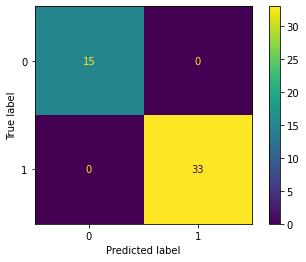

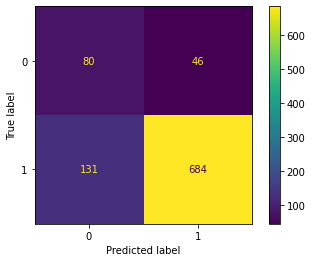

              precision    recall  f1-score   support

      Tumour       0.38      0.63      0.47       126
      Normal       0.94      0.84      0.89       815

    accuracy                           0.81       941
   macro avg       0.66      0.74      0.68       941
weighted avg       0.86      0.81      0.83       941

--------------------------------------------------------------------------------
                                   MDE_TMDS	                                    
--------------------------------------------------------------------------------
1308 66 173
              precision    recall  f1-score   support

      Tumour       1.00      1.00      1.00        15
      Normal       1.00      1.00      1.00        33

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



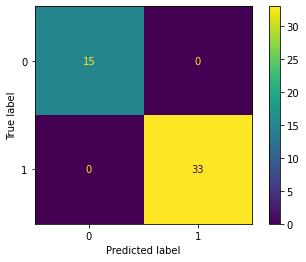

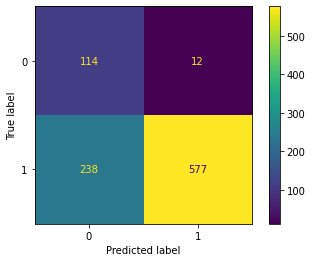

              precision    recall  f1-score   support

      Tumour       0.32      0.90      0.48       126
      Normal       0.98      0.71      0.82       815

    accuracy                           0.73       941
   macro avg       0.65      0.81      0.65       941
weighted avg       0.89      0.73      0.78       941

--------------------------------------------------------------------------------
                                     TMDE	                                      
--------------------------------------------------------------------------------
308 66 173
              precision    recall  f1-score   support

      Tumour       1.00      1.00      1.00        15
      Normal       1.00      1.00      1.00        33

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



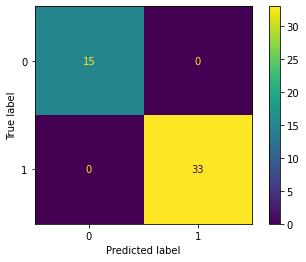

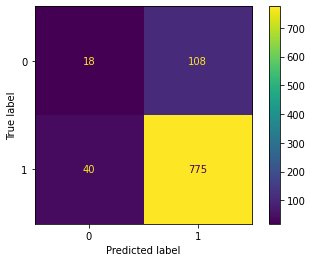

              precision    recall  f1-score   support

      Tumour       0.31      0.14      0.20       126
      Normal       0.88      0.95      0.91       815

    accuracy                           0.84       941
   macro avg       0.59      0.55      0.55       941
weighted avg       0.80      0.84      0.82       941

--------------------------------------------------------------------------------
                                     TMDS	                                      
--------------------------------------------------------------------------------
800 66 173
              precision    recall  f1-score   support

      Tumour       1.00      1.00      1.00        15
      Normal       1.00      1.00      1.00        33

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



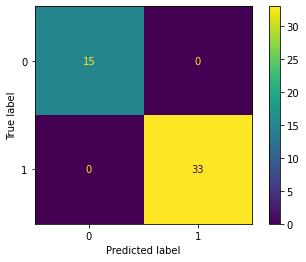

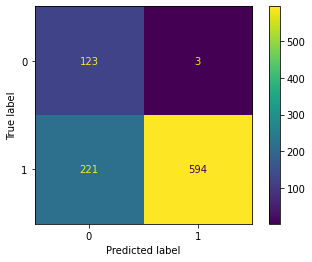

              precision    recall  f1-score   support

      Tumour       0.36      0.98      0.52       126
      Normal       0.99      0.73      0.84       815

    accuracy                           0.76       941
   macro avg       0.68      0.85      0.68       941
weighted avg       0.91      0.76      0.80       941

--------------------------------------------------------------------------------
                                     TPDE	                                      
--------------------------------------------------------------------------------
257 66 173
              precision    recall  f1-score   support

      Tumour       1.00      1.00      1.00        15
      Normal       1.00      1.00      1.00        33

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



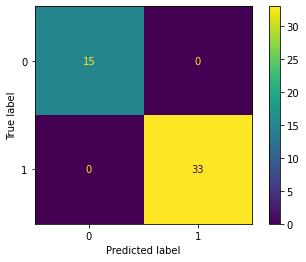

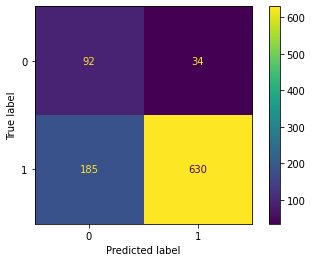

              precision    recall  f1-score   support

      Tumour       0.33      0.73      0.46       126
      Normal       0.95      0.77      0.85       815

    accuracy                           0.77       941
   macro avg       0.64      0.75      0.65       941
weighted avg       0.87      0.77      0.80       941

--------------------------------------------------------------------------------
                                   TPDE_TMDS	                                   
--------------------------------------------------------------------------------
1069 66 173
              precision    recall  f1-score   support

      Tumour       1.00      1.00      1.00        15
      Normal       1.00      1.00      1.00        33

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



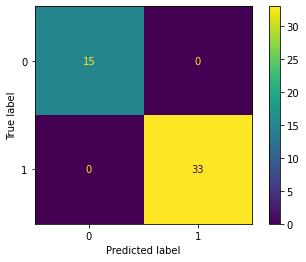

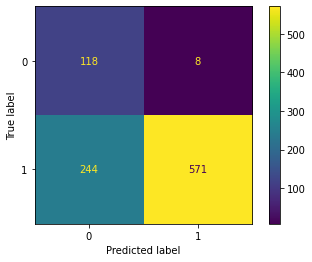

              precision    recall  f1-score   support

      Tumour       0.33      0.94      0.48       126
      Normal       0.99      0.70      0.82       815

    accuracy                           0.73       941
   macro avg       0.66      0.82      0.65       941
weighted avg       0.90      0.73      0.77       941

--------------------------------------------------------------------------------
                                     TPDS	                                      
--------------------------------------------------------------------------------
539 66 173
              precision    recall  f1-score   support

      Tumour       1.00      1.00      1.00        15
      Normal       1.00      1.00      1.00        33

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



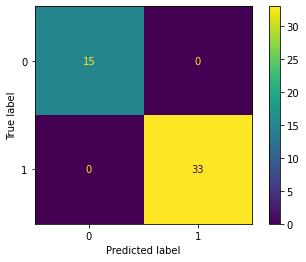

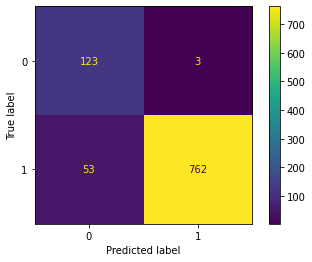

              precision    recall  f1-score   support

      Tumour       0.70      0.98      0.81       126
      Normal       1.00      0.93      0.96       815

    accuracy                           0.94       941
   macro avg       0.85      0.96      0.89       941
weighted avg       0.96      0.94      0.94       941

--------------------------------------------------------------------------------
                                   TPDS_TMDE	                                   
--------------------------------------------------------------------------------
1420 66 173
              precision    recall  f1-score   support

      Tumour       1.00      1.00      1.00        15
      Normal       1.00      1.00      1.00        33

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



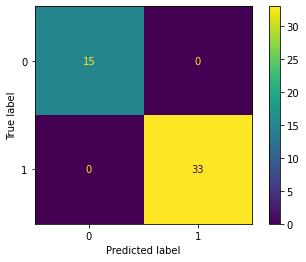

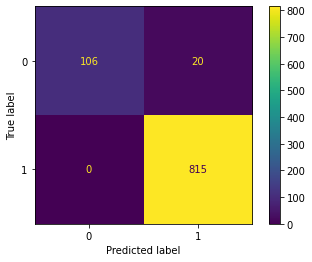

              precision    recall  f1-score   support

      Tumour       1.00      0.84      0.91       126
      Normal       0.98      1.00      0.99       815

    accuracy                           0.98       941
   macro avg       0.99      0.92      0.95       941
weighted avg       0.98      0.98      0.98       941



In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.metrics import classification_report
from sciutil import SciUtil

u = SciUtil()

rcm_labels = ["MDS", "MDS_TMDE", "MDE", "MDE_TMDS", "TMDE", "TMDS", "TPDE", "TPDE_TMDS",  "TPDS", "TPDS_TMDE"]

for r in rcm_labels:
    u.dp([r])
    de_genes = rcm_df[rcm_df['Regulation_Grouping_2'].isin([r])]['ensembl_gene_id'].values
    #de_genes = de_genes[de_genes['padj_rna'] < 0.05]
    #de_genes = de_genes[abs(de_genes['logFC_rna']) > 1]['ensembl_gene_id'].values

    de_genes = raw_rna_df[raw_rna_df.ensembl_gene_id.isin(de_genes)]
    # Now we want to save for each training the genes as features and each patient as a training data
    normal_patients = de_genes[['ensembl_gene_id'] + [c for c in de_genes.columns if 'Normal' in c]]
    tumor_patients = de_genes[['ensembl_gene_id'] + [c for c in de_genes.columns if 'Tumor' in c]]
    print(len(de_genes), len(normal_patients.columns) -1, len(tumor_patients.columns) - 1)

    normal_patients.set_index('ensembl_gene_id', inplace=True)
    tumor_patients.set_index('ensembl_gene_id', inplace=True)
    tumor_patients  = tumor_patients.T
    normal_patients = normal_patients.T

    all_patients = pd.concat([tumor_patients, normal_patients])

    X = np.log2(all_patients.values + 1)
    y = [1]* len(tumor_patients) + [0] * len(normal_patients)
    clf = RandomForestClassifier(max_depth=2, random_state=0)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    clf.fit(X_train, y_train)
    
    plot_confusion_matrix(clf, X_test, y_test)  
    
    print(classification_report(y_test, clf.predict(X_test), target_names=['Tumour', 'Normal']))
    
    plt.show()

    # Test on the TCGA dataset
    shared_genes = list(de_genes['ensembl_gene_id'].values)

    tcga_df = tcga_df_all[tcga_df_all['ensembl_gene_id'].isin(shared_genes)]
    tcga_df = tcga_df[['ensembl_gene_id'] + [c for c in tcga_df.columns if 'TCGA' in c]]
    tcga_df.set_index('ensembl_gene_id', inplace=True)
    tcga_df = tcga_df.T
    tcga_genes = tcga_df[list(all_patients.columns)]
    X_test = np.log2(tcga_genes + 1)
    y_test = [1 if 'Tumor' in c else 0 for c in tcga_genes.index.values]
    plot_confusion_matrix(clf, X_test, y_test)
    plt.show()
    
    print(classification_report(y_test, clf.predict(X_test), target_names=['Tumour', 'Normal']))


--------------------------------------------------------------------------------
                                      MDS	                                      
--------------------------------------------------------------------------------
131 66 173
              precision    recall  f1-score   support

      Tumour       0.91      1.00      0.95        21
      Normal       1.00      0.97      0.98        58

    accuracy                           0.97        79
   macro avg       0.96      0.98      0.97        79
weighted avg       0.98      0.97      0.98        79



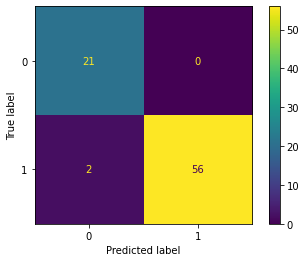

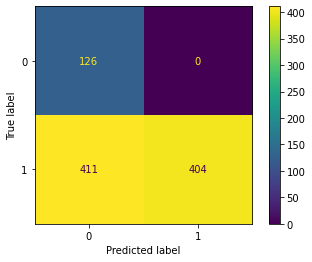

              precision    recall  f1-score   support

      Tumour       0.23      1.00      0.38       126
      Normal       1.00      0.50      0.66       815

    accuracy                           0.56       941
   macro avg       0.62      0.75      0.52       941
weighted avg       0.90      0.56      0.62       941

--------------------------------------------------------------------------------
                                   MDS_TMDE	                                    
--------------------------------------------------------------------------------
463 66 173
              precision    recall  f1-score   support

      Tumour       0.91      0.95      0.93        21
      Normal       0.98      0.97      0.97        58

    accuracy                           0.96        79
   macro avg       0.95      0.96      0.95        79
weighted avg       0.96      0.96      0.96        79



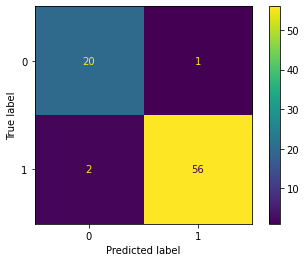

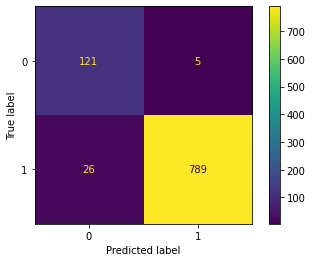

              precision    recall  f1-score   support

      Tumour       0.82      0.96      0.89       126
      Normal       0.99      0.97      0.98       815

    accuracy                           0.97       941
   macro avg       0.91      0.96      0.93       941
weighted avg       0.97      0.97      0.97       941

--------------------------------------------------------------------------------
                                      MDE	                                      
--------------------------------------------------------------------------------
415 66 173
              precision    recall  f1-score   support

      Tumour       0.95      1.00      0.98        21
      Normal       1.00      0.98      0.99        58

    accuracy                           0.99        79
   macro avg       0.98      0.99      0.98        79
weighted avg       0.99      0.99      0.99        79



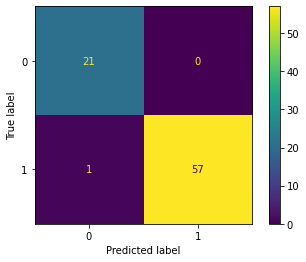

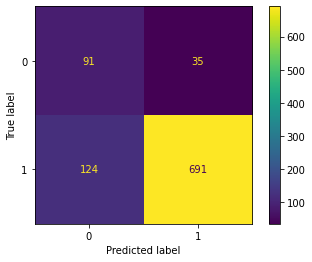

              precision    recall  f1-score   support

      Tumour       0.42      0.72      0.53       126
      Normal       0.95      0.85      0.90       815

    accuracy                           0.83       941
   macro avg       0.69      0.79      0.72       941
weighted avg       0.88      0.83      0.85       941

--------------------------------------------------------------------------------
                                   MDE_TMDS	                                    
--------------------------------------------------------------------------------
1308 66 173
              precision    recall  f1-score   support

      Tumour       0.70      0.90      0.79        21
      Normal       0.96      0.86      0.91        58

    accuracy                           0.87        79
   macro avg       0.83      0.88      0.85        79
weighted avg       0.89      0.87      0.88        79



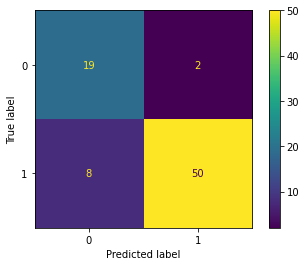

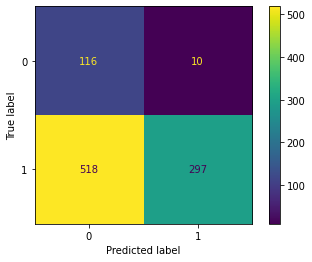

              precision    recall  f1-score   support

      Tumour       0.18      0.92      0.31       126
      Normal       0.97      0.36      0.53       815

    accuracy                           0.44       941
   macro avg       0.58      0.64      0.42       941
weighted avg       0.86      0.44      0.50       941

--------------------------------------------------------------------------------
                                     TMDE	                                      
--------------------------------------------------------------------------------
308 66 173
              precision    recall  f1-score   support

      Tumour       0.80      0.95      0.87        21
      Normal       0.98      0.91      0.95        58

    accuracy                           0.92        79
   macro avg       0.89      0.93      0.91        79
weighted avg       0.93      0.92      0.93        79



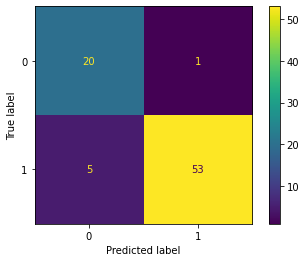

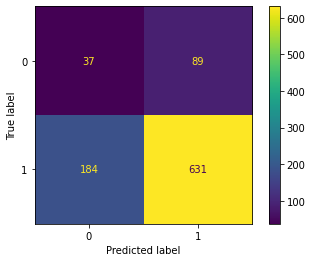

              precision    recall  f1-score   support

      Tumour       0.17      0.29      0.21       126
      Normal       0.88      0.77      0.82       815

    accuracy                           0.71       941
   macro avg       0.52      0.53      0.52       941
weighted avg       0.78      0.71      0.74       941

--------------------------------------------------------------------------------
                                     TMDS	                                      
--------------------------------------------------------------------------------
800 66 173
              precision    recall  f1-score   support

      Tumour       0.00      0.00      0.00        21
      Normal       0.73      1.00      0.85        58

    accuracy                           0.73        79
   macro avg       0.37      0.50      0.42        79
weighted avg       0.54      0.73      0.62        79



/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

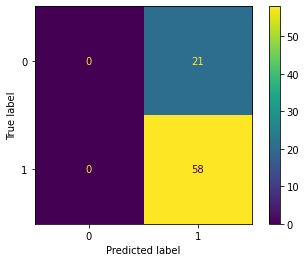

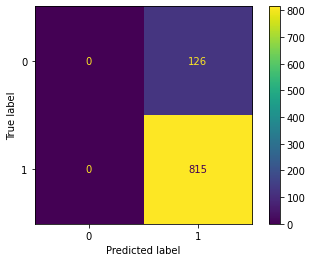

              precision    recall  f1-score   support

      Tumour       0.00      0.00      0.00       126
      Normal       0.87      1.00      0.93       815

    accuracy                           0.87       941
   macro avg       0.43      0.50      0.46       941
weighted avg       0.75      0.87      0.80       941

--------------------------------------------------------------------------------
                                     TPDE	                                      
--------------------------------------------------------------------------------
257 66 173
              precision    recall  f1-score   support

      Tumour       0.95      1.00      0.98        21
      Normal       1.00      0.98      0.99        58

    accuracy                           0.99        79
   macro avg       0.98      0.99      0.98        79
weighted avg       0.99      0.99      0.99        79



/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

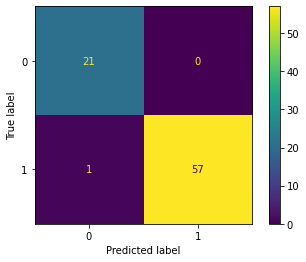

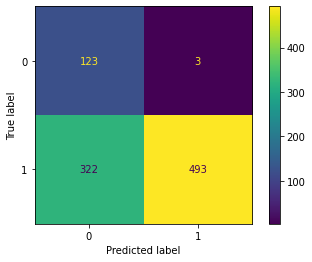

              precision    recall  f1-score   support

      Tumour       0.28      0.98      0.43       126
      Normal       0.99      0.60      0.75       815

    accuracy                           0.65       941
   macro avg       0.64      0.79      0.59       941
weighted avg       0.90      0.65      0.71       941

--------------------------------------------------------------------------------
                                   TPDE_TMDS	                                   
--------------------------------------------------------------------------------
1069 66 173
              precision    recall  f1-score   support

      Tumour       0.82      0.86      0.84        21
      Normal       0.95      0.93      0.94        58

    accuracy                           0.91        79
   macro avg       0.88      0.89      0.89        79
weighted avg       0.91      0.91      0.91        79



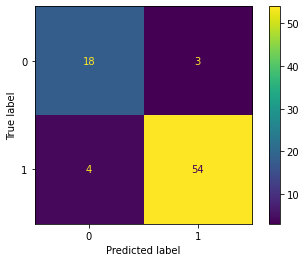

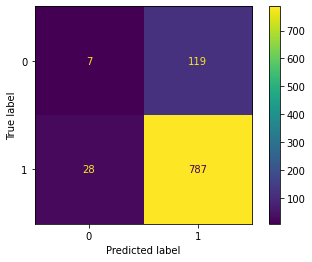

              precision    recall  f1-score   support

      Tumour       0.20      0.06      0.09       126
      Normal       0.87      0.97      0.91       815

    accuracy                           0.84       941
   macro avg       0.53      0.51      0.50       941
weighted avg       0.78      0.84      0.80       941

--------------------------------------------------------------------------------
                                     TPDS	                                      
--------------------------------------------------------------------------------
539 66 173
              precision    recall  f1-score   support

      Tumour       0.90      0.86      0.88        21
      Normal       0.95      0.97      0.96        58

    accuracy                           0.94        79
   macro avg       0.92      0.91      0.92        79
weighted avg       0.94      0.94      0.94        79



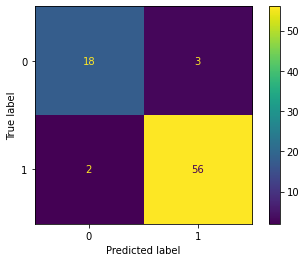

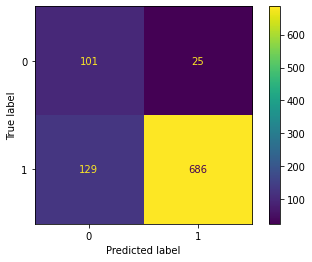

              precision    recall  f1-score   support

      Tumour       0.44      0.80      0.57       126
      Normal       0.96      0.84      0.90       815

    accuracy                           0.84       941
   macro avg       0.70      0.82      0.73       941
weighted avg       0.89      0.84      0.85       941

--------------------------------------------------------------------------------
                                   TPDS_TMDE	                                   
--------------------------------------------------------------------------------
1420 66 173
              precision    recall  f1-score   support

      Tumour       0.83      0.90      0.86        21
      Normal       0.96      0.93      0.95        58

    accuracy                           0.92        79
   macro avg       0.90      0.92      0.91        79
weighted avg       0.93      0.92      0.93        79



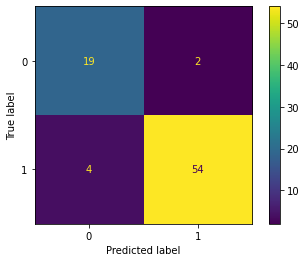

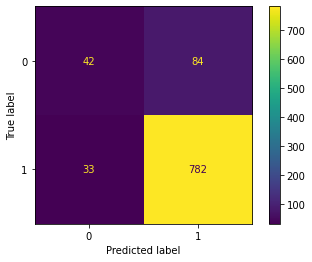

              precision    recall  f1-score   support

      Tumour       0.56      0.33      0.42       126
      Normal       0.90      0.96      0.93       815

    accuracy                           0.88       941
   macro avg       0.73      0.65      0.67       941
weighted avg       0.86      0.88      0.86       941



In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.metrics import classification_report
from sciutil import SciUtil

u = SciUtil()

rcm_labels = ["MDS", "MDS_TMDE", "MDE", "MDE_TMDS", "TMDE", "TMDS", "TPDE", "TPDE_TMDS",  "TPDS", "TPDS_TMDE"]

for r in rcm_labels:
    u.dp([r])
    de_genes = rcm_df[rcm_df['Regulation_Grouping_2'].isin([r])]['ensembl_gene_id'].values
    #de_genes = de_genes[de_genes['padj_rna'] < 0.05]
    #de_genes = de_genes[abs(de_genes['logFC_rna']) > 1]['ensembl_gene_id'].values

    de_genes = raw_rna_df[raw_rna_df.ensembl_gene_id.isin(de_genes)]
    # Now we want to save for each training the genes as features and each patient as a training data
    normal_patients = de_genes[['ensembl_gene_id'] + [c for c in de_genes.columns if 'Normal' in c]]
    tumor_patients = de_genes[['ensembl_gene_id'] + [c for c in de_genes.columns if 'Tumor' in c]]
    print(len(de_genes), len(normal_patients.columns) -1, len(tumor_patients.columns) - 1)

    normal_patients.set_index('ensembl_gene_id', inplace=True)
    tumor_patients.set_index('ensembl_gene_id', inplace=True)
    tumor_patients  = tumor_patients.T
    normal_patients = normal_patients.T

    all_patients = pd.concat([tumor_patients, normal_patients])

    X = np.log2(all_patients.values + 1)
    y = [1]* len(tumor_patients) + [0] * len(normal_patients)
    clf = DecisionTreeClassifier(random_state=0, max_depth=1, min_samples_split=20, min_samples_leaf=5, max_features=5)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    clf.fit(X_train, y_train)
    
    plot_confusion_matrix(clf, X_test, y_test)  
    
    print(classification_report(y_test, clf.predict(X_test), target_names=['Tumour', 'Normal']))
    
    plt.show()

    # Test on the TCGA dataset
    shared_genes = list(de_genes['ensembl_gene_id'].values)

    tcga_df = tcga_df_all[tcga_df_all['ensembl_gene_id'].isin(shared_genes)]
    tcga_df = tcga_df[['ensembl_gene_id'] + [c for c in tcga_df.columns if 'TCGA' in c]]
    tcga_df.set_index('ensembl_gene_id', inplace=True)
    tcga_df = tcga_df.T
    tcga_genes = tcga_df[list(all_patients.columns)]
    X_test = np.log2(tcga_genes + 1)
    y_test = [1 if 'Tumor' in c else 0 for c in tcga_genes.index.values]
    plot_confusion_matrix(clf, X_test, y_test)
    plt.show()
    
    print(classification_report(y_test, clf.predict(X_test), target_names=['Tumour', 'Normal']))


## Next section we want to test how well our genes determine the different groups 

i.e. does using the late stage vs early stage generalise better??? Than just using the genes from the late vs early DE analysis

In [73]:
tcga_df

ensembl_gene_id,ENSG00000000971,ENSG00000004846,ENSG00000006788,ENSG00000007314,ENSG00000007350,ENSG00000008735,ENSG00000009765,ENSG00000010310,ENSG00000010932,ENSG00000011028,...,ENSG00000280451,ENSG00000280537,ENSG00000280604,ENSG00000280650,ENSG00000280920,ENSG00000281162,ENSG00000281327,ENSG00000281398,ENSG00000281406,ENSG00000281613
TCGA-KIRC_PrimaryTumor_male_white_4_htseq.counts_None_43_TCGA-KIRC_TCGA-B0-5115_22245d1e-8376-46e1-8d3c-b5c3961c772e,5290,1,3,862,24,29,12,25,5423,3523,...,1,82,3,3,15,85,1,56,6,0
TCGA-KIRP_PrimaryTumor_male_white_4_htseq.counts_329_63_TCGA-KIRP_TCGA-BQ-5889_81ab86c9-90d8-45e8-a5ea-ee7266d7fbdc,5052,10,2,55,9,154,325,77,1116,9124,...,0,8,14,0,0,49,0,38,191,0
TCGA-KIRC_PrimaryTumor_male_white_4_htseq.counts_42_75_TCGA-KIRC_TCGA-B0-4698_a2b37f47-4f1a-4380-ae74-54fc6dd86c5f,2424,1,277,117,3,198,5,162,128,28305,...,0,50,1,3,0,63,0,653,17,1
TCGA-KIRP_PrimaryTumor_male_blackorafricanamerican_4_htseq.counts_270_60_TCGA-KIRP_TCGA-BQ-5877_661829b5-a067-467f-aa58-518c8f91bad9,11788,3,0,13,53,64,12,47,805,3298,...,0,2,0,1,0,14,0,47,45,0
TCGA-KICH_PrimaryTumor_male_white_4_htseq.counts_855_67_TCGA-KICH_TCGA-KL-8339_861bc99c-99f0-479b-bada-be11f68026c7,169,0,0,30,57,39,1,243,10,398,...,0,9,0,0,0,0,0,115,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-KIRP_PrimaryTumor_male_blackorafricanamerican_1_htseq.counts_None_43_TCGA-KIRP_TCGA-DW-7963_6e73166a-9dc8-4fc2-95d0-4a8b921ce3d9,398,4,1,7,0,6,348,32,1344,582,...,0,8,1,0,0,2,0,9,76,0
TCGA-KIRC_PrimaryTumor_female_white_1_htseq.counts_None_41_TCGA-KIRC_TCGA-B8-5552_50b48a7e-8dba-4316-94b2-42f0b1b16e1e,12659,22,93,969,39,35,152,25,2060,4113,...,0,38,1,0,3,214,2,24,4,0
TCGA-KICH_PrimaryTumor_female_white_1_htseq.counts_None_44_TCGA-KICH_TCGA-KO-8415_5950dbf0-452d-466c-9bf6-c10177cb16ac,159,2,1,21,3,93,1347,162,62,918,...,0,14,7,0,0,5,2,16,1,0
TCGA-KIRC_PrimaryTumor_male_notreported_1_htseq.counts_None_54_TCGA-KIRC_TCGA-A3-3380_81791559-9f71-4f97-97b0-fef5e92278fd,2895,24,4,1198,24,150,426,35,1406,2435,...,0,36,3,5,10,43,1,83,4,0


In [21]:
# Get the DE stages
de_all_stages = pd.read_csv(f'../data/sircle/F2_DE_output_TvN/rna_DE_Stage IV vs Stage I_sircle.csv')
de_stages = de_stages[de_stages['padj_rna'] < 0.05]
de_stages

,Unnamed: 0,external_gene_name,entrezgene_id,hgnc_symbol,logFC_rna,stat_rna,pvalue_rna,padj_rna,lfcSE_rna,baseMean_rna,...,RNA_Tumor_C3N.01220_1,RNA_Tumor_C3N.01220_2,RNA_Tumor_C3N.01220_3,RNA_Tumor_C3N.01261_1,RNA_Tumor_C3N.01261_2,RNA_Tumor_C3N.01361_1,RNA_Tumor_C3N.01522_1,RNA_Tumor_C3N.01522_2,RNA_Tumor_C3N.01522_3,RNA_Tumor_C3N.01808_1
1,ENSG00000000005,TNMD,64102.0,TNMD,-0.852038,-2.622434,8.730420e-03,2.940508e-02,0.324904,38.189543,...,0.283020,0.626102,0.752258,0.572098,1.692981,0.980528,2.305719,0.788598,2.345085,0.282077
2,ENSG00000000419,DPM1,8813.0,DPM1,0.375327,4.982934,6.262716e-07,1.100139e-05,0.075322,1125.623639,...,5.536642,5.415683,5.420419,4.736123,4.722071,4.773325,4.700098,4.987602,4.928374,4.720171
5,ENSG00000000938,FGR,2268.0,FGR,0.514223,3.824013,1.312972e-04,9.582890e-04,0.134472,793.320897,...,5.555234,4.425832,4.146093,4.244129,4.299614,3.698976,4.129725,3.574214,5.533122,3.948360
6,ENSG00000000971,CFH,3075.0,CFH,1.449065,6.516389,7.202008e-11,4.792842e-09,0.222372,7491.286146,...,8.906728,9.418048,9.852839,5.672009,5.767123,6.782565,6.878910,4.732500,8.030104,5.423714
7,ENSG00000001036,FUCA2,2519.0,FUCA2,0.424399,4.218422,2.460181e-05,2.366743e-04,0.100606,2815.881718,...,5.944077,6.370085,6.364949,5.951031,6.160401,5.494360,5.988822,5.915172,5.558010,5.669990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35507,ENSG00000281491,DNAJB5-DT,101926900.0,DNAJB5-DT,-0.902947,-3.172269,1.512528e-03,7.105873e-03,0.284638,14.111564,...,0.224751,0.036856,0.105742,0.456459,0.186316,0.279324,0.942404,0.850114,1.046640,0.353484
35510,ENSG00000281538,NaN,NaN,NaN,-0.515522,-2.761702,5.750091e-03,2.103139e-02,0.186668,20.980149,...,0.419162,0.142090,0.071349,0.572098,0.527204,0.672115,0.578231,0.586550,0.852625,0.167868
35512,ENSG00000281593,NaN,NaN,NaN,-0.524879,-3.494677,4.746356e-04,2.775568e-03,0.150194,45.588598,...,0.613350,0.332000,0.856925,0.704718,0.891183,1.291552,1.417905,0.965794,1.534804,0.874150
35513,ENSG00000281613,NaN,NaN,NaN,-2.593142,-3.126245,1.770542e-03,8.085295e-03,0.829475,1.742771,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
sample_info = pd.read_csv('../data/sircle/F1_DE_input_TvN/rna_sample_data_all_patients_ccRCC_sircle.csv')
stage4 = sample_info[sample_info['TumorStage'] == 'Stage IV']
stage1 = sample_info[sample_info['TumorStage'] == 'Stage I']


In [27]:
de_stages.rename(columns={'Unnamed: 0':'ensembl_gene_id'}, inplace=True) 

2885 99 37


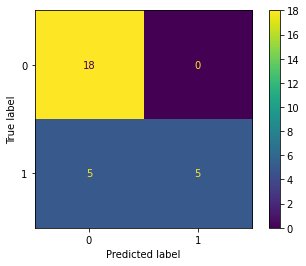

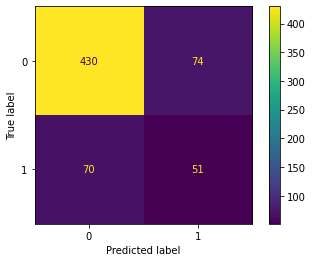

In [72]:

de_genes = de_stages[abs(de_stages['logFC_rna']) > 1.0]['ensembl_gene_id'].values
de_genes = raw_rna_df[raw_rna_df.ensembl_gene_id.isin(de_genes)]

# Now we want to save for each training the genes as features and each patient as a training data
stage1_patients = de_genes[['ensembl_gene_id'] + list(stage1['FullLabel'].values)]
stage4_patients = de_genes[['ensembl_gene_id'] + list(stage4['FullLabel'].values)]
print(len(de_genes), len(stage1_patients.columns) -1, len(stage4_patients.columns) - 1)

stage1_patients.set_index('ensembl_gene_id', inplace=True)
stage4_patients.set_index('ensembl_gene_id', inplace=True)
stage4_patients  = stage4_patients.T
stage1_patients = stage1_patients.T

all_patients = pd.concat([stage4_patients, stage1_patients])

X = np.log2(all_patients.values + 1)
y = [1]* len(stage4_patients) + [0] * len(stage1_patients)
clf = RandomForestClassifier(max_depth=2, random_state=0)
#clf = DecisionTreeClassifier(random_state=0, max_depth=1, min_samples_split=20, min_samples_leaf=5, max_features=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()


# Test on the TCGA dataset
shared_genes = list(de_genes['ensembl_gene_id'].values)

tcga_df = tcga_df_all[tcga_df_all['ensembl_gene_id'].isin(shared_genes)]
stage4_cols = [c for c in tcga_df_all if 'TCGA' in c and (c.split('_')[4] == '4' or  c.split('_')[4] == '3')]
stage1_cols = [c for c in tcga_df_all if 'TCGA' in c and (c.split('_')[4] == '1' or  c.split('_')[4] == '2')]

stage4_cols = [c for c in tcga_df_all if 'TCGA' in c and (c.split('_')[4] == '4')] # or  c.split('_')[4] == '3')]
stage1_cols = [c for c in tcga_df_all if 'TCGA' in c and (c.split('_')[4] == '1')] # or  c.split('_')[4] == '2')]


tcga_df = tcga_df[['ensembl_gene_id'] + stage4_cols + stage1_cols]
tcga_df.set_index('ensembl_gene_id', inplace=True)
tcga_df = tcga_df.T
tcga_genes = tcga_df[list(all_patients.columns)]
tcga_genes = np.log2(tcga_genes + 1)

y_test = [1 if c.split('_')[4] == '4' or c.split('_')[4] == '3' else 0 for c in tcga_genes.index.values]
plot_confusion_matrix(clf, tcga_genes.values, y_test)

584 99 37


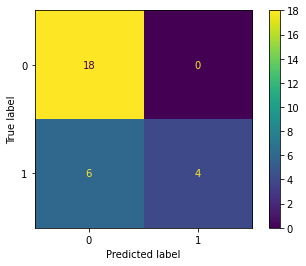

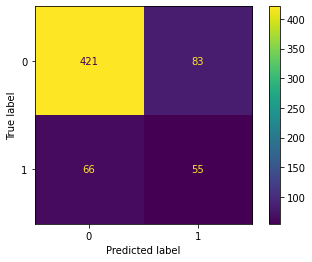

In [69]:
sircle_stages = pd.read_csv(f'../data/sircle/F6_integrative_comparisons/mean_Integrated_comparison_Stage IV-Stage I.csv')
sircle_stages
stages_genes = sircle_stages[sircle_stages['Integrated padj (Stage IV-Stage I)'] < 0.05]

de_genes = stages_genes['id'].values
de_genes = raw_rna_df[raw_rna_df.ensembl_gene_id.isin(de_genes)]

# Now we want to save for each training the genes as features and each patient as a training data
stage1_patients = de_genes[['ensembl_gene_id'] + list(stage1['FullLabel'].values)]
stage4_patients = de_genes[['ensembl_gene_id'] + list(stage4['FullLabel'].values)]
print(len(de_genes), len(stage1_patients.columns) -1, len(stage4_patients.columns) - 1)

stage1_patients.set_index('ensembl_gene_id', inplace=True)
stage4_patients.set_index('ensembl_gene_id', inplace=True)
stage4_patients  = stage4_patients.T
stage1_patients = stage1_patients.T

all_patients = pd.concat([stage4_patients, stage1_patients])

X = np.log2(all_patients.values + 1)
y = [1]* len(stage4_patients) + [0] * len(stage1_patients)
clf = RandomForestClassifier(max_depth=2, random_state=0)
#clf = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_split=10, min_samples_leaf=5, max_features=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()


# Test on the TCGA dataset
shared_genes = list(de_genes['ensembl_gene_id'].values)

tcga_df = tcga_df_all[tcga_df_all['ensembl_gene_id'].isin(shared_genes)]
stage4_cols = [c for c in tcga_df_all if 'TCGA' in c and (c.split('_')[4] == '4' or  c.split('_')[4] == '3')]
stage1_cols = [c for c in tcga_df_all if 'TCGA' in c and (c.split('_')[4] == '1' or  c.split('_')[4] == '2')]

stage4_cols = [c for c in tcga_df_all if 'TCGA' in c and (c.split('_')[4] == '4')] # or  c.split('_')[4] == '3')]
stage1_cols = [c for c in tcga_df_all if 'TCGA' in c and (c.split('_')[4] == '1')] # or  c.split('_')[4] == '2')]


tcga_df = tcga_df[['ensembl_gene_id'] + stage4_cols + stage1_cols]
tcga_df.set_index('ensembl_gene_id', inplace=True)
tcga_df = tcga_df.T
tcga_genes = tcga_df[list(all_patients.columns)]
tcga_genes = np.log2(tcga_genes + 1)

y_test = [1 if c.split('_')[4] == '4' or c.split('_')[4] == '3' else 0 for c in tcga_genes.index.values]
plot_confusion_matrix(clf, tcga_genes.values, y_test)

37 99 37


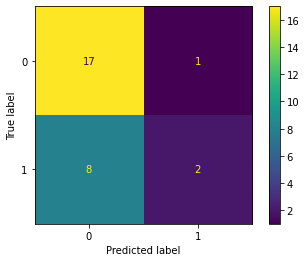

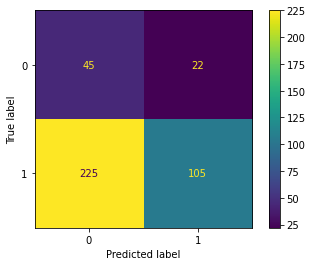

In [80]:
sircle_stages = pd.read_csv(f'../data/sircle/F6_integrative_comparisons/mean_Integrated_comparison_old-young.csv')
sircle_stages
stages_genes = sircle_stages[sircle_stages['Integrated padj (old-young)'] < 0.05]

de_genes = stages_genes['id'].values
de_genes = raw_rna_df[raw_rna_df.ensembl_gene_id.isin(de_genes)]

# Now we want to save for each training the genes as features and each patient as a training data
stage1_patients = de_genes[['ensembl_gene_id'] + list(stage1['FullLabel'].values)]
stage4_patients = de_genes[['ensembl_gene_id'] + list(stage4['FullLabel'].values)]
print(len(de_genes), len(stage1_patients.columns) -1, len(stage4_patients.columns) - 1)

stage1_patients.set_index('ensembl_gene_id', inplace=True)
stage4_patients.set_index('ensembl_gene_id', inplace=True)
stage4_patients  = stage4_patients.T
stage1_patients = stage1_patients.T

all_patients = pd.concat([stage4_patients, stage1_patients])

X = np.log2(all_patients.values + 1)
y = [1]* len(stage4_patients) + [0] * len(stage1_patients)
clf = RandomForestClassifier(max_depth=2, random_state=0)
#clf = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_split=10, min_samples_leaf=5, max_features=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()


# Test on the TCGA dataset
shared_genes = list(de_genes['ensembl_gene_id'].values)

tcga_df = tcga_df_all[tcga_df_all['ensembl_gene_id'].isin(shared_genes)]
stage4_cols = [c for c in tcga_df_all if 'TCGA' in c and c.split('_')[7] != 'None' and (int(c.split('_')[7]) > 65)]
stage1_cols = [c for c in tcga_df_all if 'TCGA' in c and c.split('_')[7] != 'None' and (int(c.split('_')[7]) < 42)]

tcga_df = tcga_df[['ensembl_gene_id'] + stage4_cols + stage1_cols]
tcga_df.set_index('ensembl_gene_id', inplace=True)
tcga_df = tcga_df.T
tcga_genes = tcga_df[list(all_patients.columns)]
tcga_genes = np.log2(tcga_genes + 1)

y_test = [1 if (int(c.split('_')[7]) > 65) else 0 for c in tcga_genes.index.values]
plot_confusion_matrix(clf, tcga_genes.values, y_test)

In [78]:
# Get the DE stages
de_all_stages = pd.read_csv(f'../data/sircle/F2_DE_output_TvN/rna_DE_Stage IV vs Stage I_sircle.csv')
de_stages = de_stages[de_stages['padj_rna'] < 0.05]
de_stages

de_genes = de_stages[abs(de_stages['logFC_rna']) > 1.0]['ensembl_gene_id'].values
de_genes = raw_rna_df[raw_rna_df.ensembl_gene_id.isin(de_genes)]

# Now we want to save for each training the genes as features and each patient as a training data
stage1_patients = de_genes[['ensembl_gene_id'] + list(stage1['FullLabel'].values)]
stage4_patients = de_genes[['ensembl_gene_id'] + list(stage4['FullLabel'].values)]
print(len(de_genes), len(stage1_patients.columns) -1, len(stage4_patients.columns) - 1)

stage1_patients.set_index('ensembl_gene_id', inplace=True)
stage4_patients.set_index('ensembl_gene_id', inplace=True)
stage4_patients  = stage4_patients.T
stage1_patients = stage1_patients.T

all_patients = pd.concat([stage4_patients, stage1_patients])

X = np.log2(all_patients.values + 1)
y = [1]* len(stage4_patients) + [0] * len(stage1_patients)
clf = RandomForestClassifier(max_depth=2, random_state=0)
#clf = DecisionTreeClassifier(random_state=0, max_depth=1, min_samples_split=20, min_samples_leaf=5, max_features=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()


# Test on the TCGA dataset
shared_genes = list(de_genes['ensembl_gene_id'].values)

tcga_df = tcga_df_all[tcga_df_all['ensembl_gene_id'].isin(shared_genes)]
stage4_cols = [c for c in tcga_df_all if 'TCGA' in c and (c.split('_')[4] == '4' or  c.split('_')[4] == '3')]
stage1_cols = [c for c in tcga_df_all if 'TCGA' in c and (c.split('_')[4] == '1' or  c.split('_')[4] == '2')]

stage4_cols = [c for c in tcga_df_all if 'TCGA' in c and (c.split('_')[4] == '4')] # or  c.split('_')[4] == '3')]
stage1_cols = [c for c in tcga_df_all if 'TCGA' in c and (c.split('_')[4] == '1')] # or  c.split('_')[4] == '2')]


tcga_df = tcga_df[['ensembl_gene_id'] + stage4_cols + stage1_cols]
tcga_df.set_index('ensembl_gene_id', inplace=True)
tcga_df = tcga_df.T
tcga_genes = tcga_df[list(all_patients.columns)]
tcga_genes = np.log2(tcga_genes + 1)

y_test = [1 if c.split('_')[4] == '4' or c.split('_')[4] == '3' else 0 for c in tcga_genes.index.values]
plot_confusion_matrix(clf, tcga_genes.values, y_test)

,Unnamed: 0,id,TCGA-KIRC_PrimaryTumor_male_white_4_htseq.counts_None_43_TCGA-KIRC_TCGA-B0-5115_22245d1e-8376-46e1-8d3c-b5c3961c772e,TCGA-KIRC_PrimaryTumor_male_white_1_htseq.counts_None_40_TCGA-KIRC_TCGA-BP-4968_39b55de6-d4be-451b-9e7d-31da539e67fb,TCGA-KIRC_PrimaryTumor_female_white_1_htseq.counts_1625_53_TCGA-KIRC_TCGA-BP-4326_42c14f01-2589-428e-b3ee-0ac4cbb2cbe6,TCGA-KIRC_PrimaryTumor_female_white_1_htseq.counts_None_41_TCGA-KIRC_TCGA-B8-4146_837705e7-ac01-496c-bf82-4ce52b1b03d0,TCGA-KIRP_PrimaryTumor_male_white_4_htseq.counts_329_63_TCGA-KIRP_TCGA-BQ-5889_81ab86c9-90d8-45e8-a5ea-ee7266d7fbdc,TCGA-KIRP_PrimaryTumor_male_white_1_htseq.counts_None_67_TCGA-KIRP_TCGA-A4-7997_35945ed1-5f34-4ec0-85a0-a9140e46fc02,TCGA-KIRP_PrimaryTumor_female_white_1_htseq.counts_None_45_TCGA-KIRP_TCGA-A4-A5DU_657bc0f0-6d5e-41a0-8ba3-277612a22855,TCGA-KICH_PrimaryTumor_female_white_2_htseq.counts_725_56_TCGA-KICH_TCGA-KL-8325_cc9b0456-0d33-4b8f-83ae-5931fe227c68,...,TCGA-KIRP_PrimaryTumor_male_blackorafricanamerican_1_htseq.counts_None_43_TCGA-KIRP_TCGA-DW-7963_6e73166a-9dc8-4fc2-95d0-4a8b921ce3d9,TCGA-KIRC_PrimaryTumor_female_white_1_htseq.counts_None_41_TCGA-KIRC_TCGA-B8-5552_50b48a7e-8dba-4316-94b2-42f0b1b16e1e,TCGA-KIRC_SolidTissueNormal_female_white_4_htseq.counts_782_54_TCGA-KIRC_TCGA-CJ-5677_96124930-9504-4947-b81f-5ff241691f6f,TCGA-KIRP_PrimaryTumor_female_blackorafricanamerican_2_htseq.counts_None_62_TCGA-KIRP_TCGA-UZ-A9PS_56ff20e1-0655-497f-b1da-0ca6f914b901,TCGA-KICH_PrimaryTumor_female_white_1_htseq.counts_None_44_TCGA-KICH_TCGA-KO-8415_5950dbf0-452d-466c-9bf6-c10177cb16ac,TCGA-KIRC_PrimaryTumor_male_notreported_1_htseq.counts_None_54_TCGA-KIRC_TCGA-A3-3380_81791559-9f71-4f97-97b0-fef5e92278fd,TCGA-KIRC_PrimaryTumor_female_white_4_htseq.counts_709_66_TCGA-KIRC_TCGA-B8-4143_6369de09-0480-4c50-9e46-beeb10de1473,TCGA-KICH_PrimaryTumor_male_white_2_htseq.counts_None_69_TCGA-KICH_TCGA-KO-8409_85831cff-c743-4622-aa6b-fb92f48be1cb,TCGA-KIRC_PrimaryTumor_female_blackorafricanamerican_1_htseq.counts_None_60_TCGA-KIRC_TCGA-B8-A8YJ_b6488311-0f50-4c39-a896-fe14f78186ab,ensembl_gene_id
0,0,ENSG00000000003.13,2429,3944,2177,5925,2638,4406,2103,5145,...,1153,2616,4395,5355,1177,3839,1233,1675,1502,ENSG00000000003
1,1,ENSG00000000005.5,28,56,6,39,224,13,16,129,...,0,33,33,1,4,31,1,9,8,ENSG00000000005
2,2,ENSG00000000419.11,1608,1942,1244,3233,1240,3022,896,2033,...,382,1590,1459,1635,1317,1964,1293,940,1196,ENSG00000000419
3,3,ENSG00000000457.12,1203,775,589,1139,607,911,472,716,...,125,963,993,458,331,830,832,242,491,ENSG00000000457
4,4,ENSG00000000460.15,432,177,197,396,174,394,138,213,...,45,255,120,196,76,201,394,38,191,ENSG00000000460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60483,60483,__no_feature,8686610,7248890,7314898,4571322,3740595,5301161,4845466,4152619,...,1423176,3524200,3793607,4841128,3077352,7446537,7183037,4901316,3472269,__no_feature
60484,60484,__ambiguous,2589533,3415795,2832655,1763607,2738339,2870943,1553514,2297068,...,664667,2816056,2189212,2485003,2417642,2886022,2469387,1912741,2151611,__ambiguous
60485,60485,__too_low_aQual,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,__too_low_aQual
60486,60486,__not_aligned,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,__not_aligned


In [ ]:
HLRCC_ds = pd.read_csv(f'{data_dir}HLRCC_GSE157256_RSEM_counts 1.txt', sep=' ')
HLRCC_ds['ensembl_gene_id'] = [c.split('.')[0] for c in HLRCC_ds['ENSEMBL_ID|Hugo_Symbol'].values]
HLRCC_ds.set_index('ensembl_gene_id', inplace=True)

In [ ]:
HLRCC_ds

In [ ]:
HLRCC_sample_info = pd.read_csv(f'{data_dir}HLRCC_SampleInfo.csv')
HLRCC_sample_info